# Predicting Exoplanet Habitability Using Machine Learning
## Week 3: Machine Learning Dataset Preparation

### Objective
To prepare the cleaned and feature-engineered dataset for machine learning
by selecting relevant features, defining the target variable, and creating
training and testing datasets without data leakage.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set_style("whitegrid")


In [42]:
df = pd.read_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\exoplanet_cleaned.csv"
)

df.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec,st_spectype_simple,habitability_score,stellar_compatibility
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2.0,1.0,2.0,0.0,0.0,0.0,0.0,G,636.4,-4872.5
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2.0,1.0,2.0,0.0,0.0,0.0,0.0,G,636.4,-4740.5
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2.0,1.0,2.0,0.0,0.0,0.0,0.0,G,636.4,-5611.5
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,K,636.4,-4338.5
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,G,636.4,-4211.5


In [43]:
df.shape

(39212, 126)

In [44]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 39212 entries, 0 to 39211
Columns: 126 entries, rowid to stellar_compatibility
dtypes: float64(90), int64(7), str(29)
memory usage: 37.7 MB


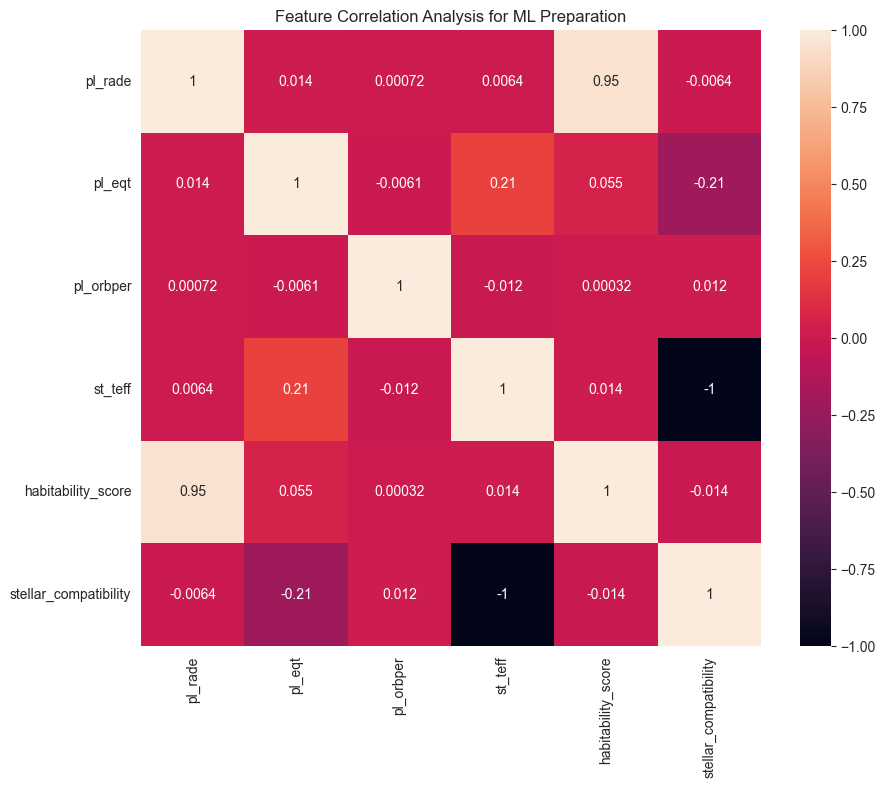

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[['pl_rade','pl_eqt','pl_orbper',
        'st_teff','habitability_score',
        'stellar_compatibility']].corr(),
    annot=True
)
plt.title("Feature Correlation Analysis for ML Preparation")
plt.show()


### Feature Selection Strategy
Features were selected based on domain knowledge from astronomy
and correlation analysis. Highly redundant or non-informative
features were avoided to reduce overfitting.


In [46]:
df['habitable'] = (df['habitability_score'] > 0.6).astype(int)

df[['habitability_score', 'habitable']].head()


,habitability_score,habitable
0,636.4,1
1,636.4,1
2,636.4,1
3,636.4,1
4,636.4,1


In [47]:
# Separate numerical and categorical features
num_cols = ['pl_rade', 'pl_eqt', 'pl_orbper', 'stellar_compatibility']
cat_cols = ['st_spectype_simple']
X = df[num_cols + cat_cols]
y = df['habitable']

X.columns


Index(['pl_rade', 'pl_eqt', 'pl_orbper', 'stellar_compatibility',
       'st_spectype_simple'],
      dtype='str')

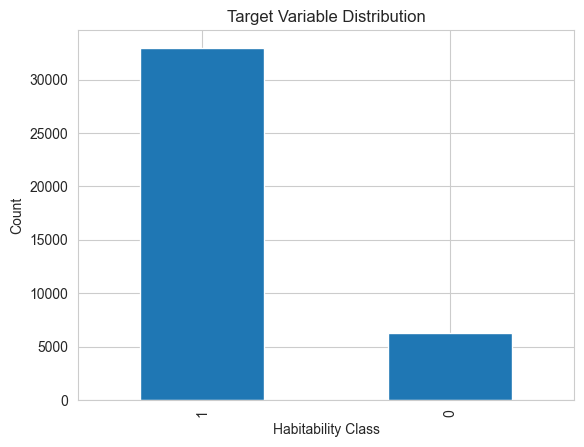

In [48]:
df['habitable'].value_counts().plot(kind='bar')
plt.xlabel("Habitability Class")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()


In [49]:
X = df[num_cols + cat_cols]
y = df['habitable']

X.head(), y.head()


(   pl_rade  pl_eqt   pl_orbper  stellar_compatibility st_spectype_simple
 0      2.3   797.0  323.210000                -4872.5                  G
 1      2.3   797.0  326.030000                -4740.5                  G
 2      2.3   797.0   10.339292                -5611.5                  G
 3      2.3   797.0  516.220000                -4338.5                  K
 4      2.3   797.0  516.219970                -4211.5                  G,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: habitable, dtype: int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((31369, 5), (7843, 5))

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [52]:
df.columns


Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_dr2_id', 'gaia_dr3_id', 'default_flag',
       ...
       'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec',
       'pl_ndispec', 'st_spectype_simple', 'habitability_score',
       'stellar_compatibility', 'habitable'],
      dtype='str', length=127)

In [53]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((31369, 15), (7843, 15))

In [54]:
import joblib

joblib.dump(
    preprocessor,
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\preprocessing_pipeline.pkl"
)


['C:\\Users\\tumar\\Desktop\\ExoHabit-AI\\data\\preprocessing_pipeline.pkl']

In [55]:
pd.DataFrame(
    X_train_scaled,
    columns=feature_cols
).describe()


,pl_rade,pl_eqt,pl_orbper,stellar_compatibility
count,3.136900e+04,3.136900e+04,3.136900e+04,3.136900e+04
mean,-8.607423e-18,1.494973e-16,-1.812089e-18,-4.181395e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-6.920003e-02,-2.801549e+00,-6.116130e-03,-3.884278e+01
25%,-4.328777e-02,-1.266960e-01,-6.114073e-03,-4.975446e-01
50%,-3.632385e-02,-1.266960e-01,-6.111617e-03,-1.577980e-01
75%,-2.984579e-02,-1.266960e-01,-6.105785e-03,3.450719e-01
max,6.928998e+01,1.127736e+01,1.770069e+02,5.509895e+00


In [56]:
X_train.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\X_train.csv",
    index=False
)

X_test.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\X_test.csv",
    index=False
)

y_train.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\y_train.csv",
    index=False
)

y_test.to_csv(
    r"C:\Users\tumar\Desktop\ExoHabit-AI\data\y_test.csv",
    index=False
)


## Week 3 Summary

- Relevant features were selected using correlation analysis and domain knowledge.
- A binary target variable was defined for habitability prediction.
- The dataset was split into training and testing sets using stratification.
- Feature scaling was applied using a pipeline to avoid data leakage.
- ML-ready datasets were generated for model training in Week 4.
